In [8]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score, explained_variance_score,r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('TESLA.csv')

In [10]:
df= df.rename(columns={'Date':'date','Open':'open','Hight':'hight','Low':'low','Close':'close','Adj Close':'adj_close','Volume':'volume'})
df.head()

,date,open,High,low,close,adj_close,volume
0,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
1,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
2,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500
3,2018-12-28,21.540001,22.416000,21.227333,22.257999,22.257999,149085000
4,2018-12-31,22.519333,22.614000,21.684000,22.186666,22.186666,94534500


In [11]:
print("Total number of day: ", df.shape[0])
print("Total number of fields: ", df.shape[1])

Total number of day:  1259
Total number of fields:  7


In [12]:
print("Null values", df.isnull().values.sum())
print("NA values:", df.isna().values.any())

Null values 0
NA values: False


In [13]:
df['date'] = pd.to_datetime(df.date)
df.head()

,date,open,High,low,close,adj_close,volume
0,2018-12-24,20.900000,20.966667,19.680000,19.692667,19.692667,83398500
1,2018-12-26,20.000000,21.798000,19.606001,21.739332,21.739332,122446500
2,2018-12-27,21.322666,21.478001,20.100000,21.075333,21.075333,128626500
3,2018-12-28,21.540001,22.416000,21.227333,22.257999,22.257999,149085000
4,2018-12-31,22.519333,22.614000,21.684000,22.186666,22.186666,94534500


In [14]:
print("Starting date:", df.loc[0]['date'])
print("Ending date:", df.loc[df.index[-1], 'date'])
print("Total date",df.loc[df.index[-1],'date'] - df.loc[0,'date'])

Starting date: 2018-12-24 00:00:00
Ending date: 2023-12-22 00:00:00
Total date 1824 days 00:00:00


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [16]:
closedf = df['close']

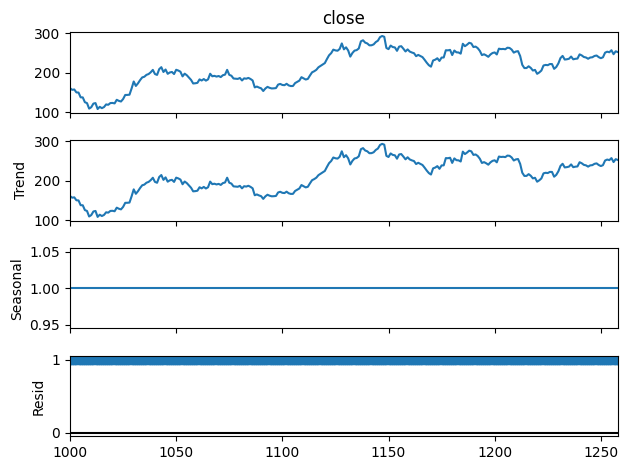

In [17]:
decompose_result = seasonal_decompose(df['close'][1000:], model = 'multiplicative', period=1)
decompose_result.plot()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Best Model - MAE: 32.072826308811806, Alpha: 0.1, Beta: 0.1, Gamma: 0.1, Seasonal Period: 40


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Best Model - MAE: 31.976236965834214, Alpha: 0.1, Beta: 0.1, Gamma: 0.3, Seasonal Period: 40


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_

Best Model - MAE: 28.545859237668193, Alpha: 0.1, Beta: 0.1, Gamma: 0.5, Seasonal Period: 40


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)


Best Model - MAE: 10.356402374215369, Alpha: 0.1, Beta: 0.1, Gamma: 0.7, Seasonal Period: 40


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_256912\4151799763.py:46: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_

MAE: 10.356402374215369
MAPE: 0.07206405017943582
R2 Score: 0.756347503701877


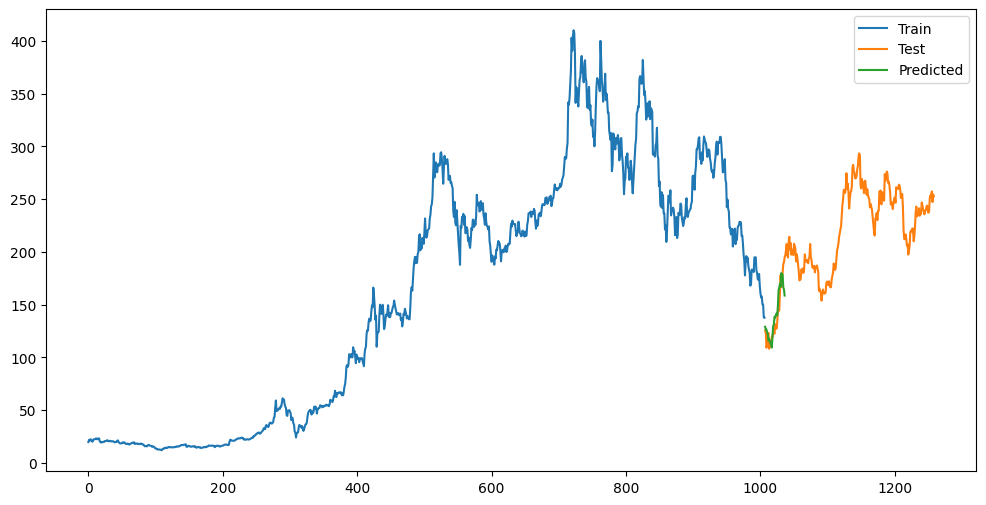

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

# Đọc dữ liệu từ file hoặc nguồn dữ liệu khác
# Giả sử df là DataFrame chứa cột 'close'

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm thử
train_size = int(len(df) * 0.8)
train, test = df[:train_size]['close'], df[train_size:]['close']

# Hàm callback để lưu mô hình tốt nhất
class SaveBestModelCallback:
    def __init__(self):
        self.best_model = None
        self.best_mae = float('inf')

    def on_epoch_end(self, model, epoch, logs):
        y_pred = model.predict(start=len(train), end=len(train) + len(test) - 1)
        mae = mean_absolute_error(test, y_pred)

        if mae < self.best_mae:
            self.best_mae = mae
            self.best_model = model
            print(f"Best Model - MAE: {mae}")

# Các giá trị alpha, beta, gamma và seasonal_period bạn muốn thử nghiệm
alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9]
beta_values = [0.1, 0.3, 0.5, 0.7, 0.9]
gamma_values = [0.1, 0.3, 0.5, 0.7, 0.9]
seasonal_period_values = [40, 50, 60]

# Thử nghiệm và lưu mô hình tốt nhất
best_mae = float('inf')
best_model = None

for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            for seasonal_period in seasonal_period_values:
                try:
                    model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=seasonal_period,
                                                 trend='add', initialization_method='estimated',
                                                 use_boxcox=True).fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

                    # Dự đoán trên tập kiểm thử
                    y_pred = model.forecast(steps=30)

                    # Kiểm tra và xử lý giá trị NaN
                    if not np.isnan(y_pred).any():
                        mae = mean_absolute_error(test[0:30], y_pred)

                        if mae < best_mae:
                            best_mae = mae
                            best_model = model
                            print(f"Best Model - MAE: {mae}, Alpha: {alpha}, Beta: {beta}, Gamma: {gamma}, Seasonal Period: {seasonal_period}")
                except Exception as e:
                    print(f"Error: {e}")
                    continue

# Sử dụng mô hình tốt nhất đã lưu lại
if best_model is not None:
    # Dự đoán trên tập kiểm thử
    y_pred = best_model.forecast(steps=30)

    # Đánh giá mô hình
    mae = mean_absolute_error(test[0:30], y_pred)
    mape = mean_absolute_percentage_error(test[0:30], y_pred)
    r2 = r2_score(test[0:30], y_pred)

    # Hiển thị kết quả
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"R2 Score: {r2}")

    # Hiển thị đồ thị dự đoán và thực tế
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.show()
else:
    print("Không tìm thấy mô hình tốt nhất.")
